<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 24 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **24 November 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## Intro to Linear Models for Regression and Classification

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

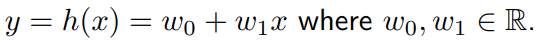

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

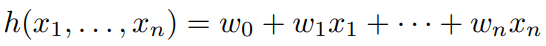

atau

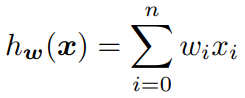

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

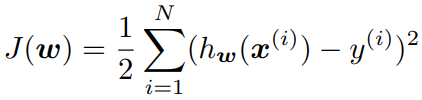

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

In [ ]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
X_train  = X.reshape(-1, 1)
y_train  = np.array([5, 7, 5, 9, 10, 4, 3, 11, 11,  2])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 5  7  5  9 10  4  3 11 11  2]


In [ ]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [2.04166667]
Intersep persamaan linear: 
 0.5749999999999993


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

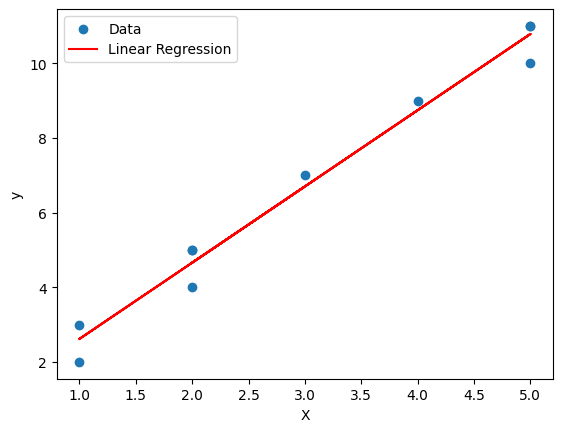

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([5, 9, 15])

y_predict = linear.predict(X_test)

print(y_predict)

[ 4.65833333  8.74166667 14.86666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [ ]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9960279605263158


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

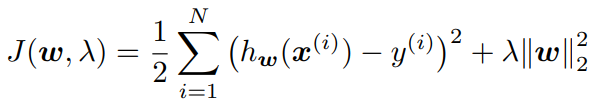

- Lasso Regression

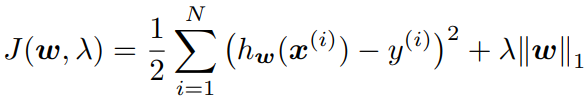

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [ ]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.88461538]
Intersep persamaan regresi ridge: 
 1.046153846153846


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

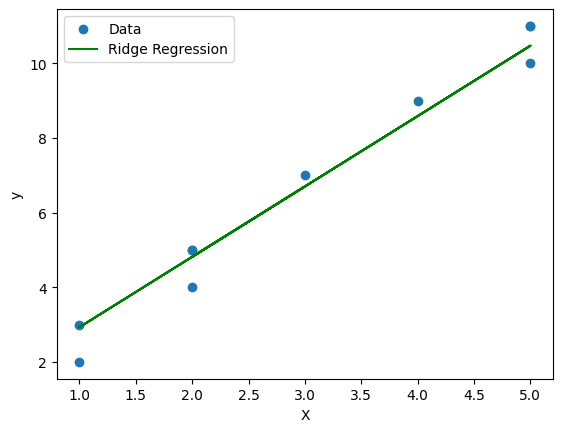

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [ ]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [ ]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.20833333]
Intersep persamaan regresi lasso: 
 3.075


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

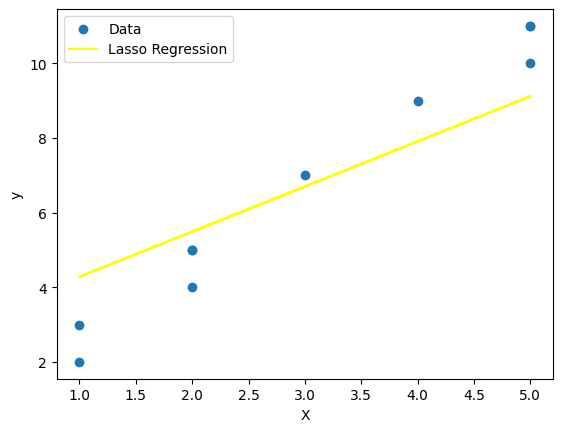

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

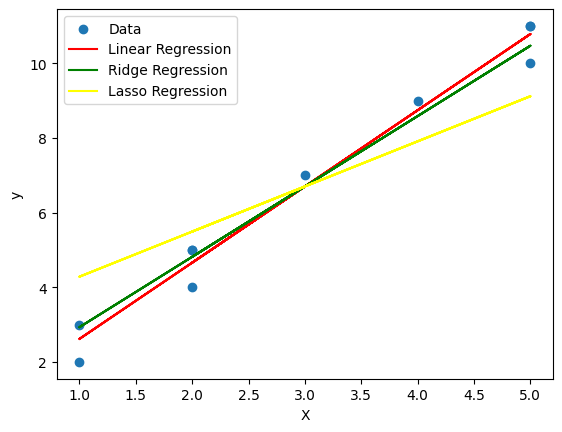

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data harga dan atribut dari sekitar 54000 berlian. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Price:** Harga berlian dalam satuan dolar AS (\$326 — \$18,823)

- **Carat:** Berat/Bobot berlian (0.2 — 5.01)

- **Cut:** Kualitas potongan berlian (Fair, Good, Very Good, Premium, Ideal)

- **Color:** Kualitas warna berlian, dari J (paling buruk) hingga D (paling baik)

- **Clarity:** Ukuran seberapa jernih berlian (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (paling baik))

- **X:** Ukuran panjang berlian dalam satuan mm (0 — 10.74)

- **Y:** Ukuran lebar berlian dalam satuan mm (0 — 58.9)

- **Z:** Ukuran kedalaman berlian dalam satuan mm (0 — 31.8)

- **Depth:** Persentase total dari kedalaman berlian =  100 * z / mean(x, y)  (43 — 79)

- **Table:** Lebar bagian atas berlian relatif terhadap titik terlebar (43 — 95)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/shivam2503/diamonds
<br/> <br/>
<img src="https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png" alt="Struktur Berlian"/>

In [ ]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_diamond = pd.read_csv('diamonds.csv')
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Soal 1: Data Preprocessing untuk Regresi

##### Descriptive Statistics

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Melakukan encoding pada data kategorikal
- Melakukan feature selection, pilih fitur-fitur yang relevan dalam memprediksi harga berlian (`price`)
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada data selain data kategorikal. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [ ]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df_diamond.describe(include=object))

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


##### Penanganan Missing Values

In [ ]:
# Melihat jumlah missing values

def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

cek_missing_values(df_diamond)

,Total,Percent


Tidak ada missing values, analisis dapat dilanjutkan

##### Penanganan Duplikasi data

In [ ]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df_diamond.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 289


In [ ]:
# Mendrop duplikasi data
df_diamond.drop_duplicates(inplace=True)

In [ ]:
print('Jumlah duplikasi pada data adalah', df_diamond.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


##### Penanganan Outliers

In [ ]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df_diamond.quantile(0.25)
Q3 = df_diamond.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df_diamond < lower_limit) | (df_diamond > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
carat      1873
clarity       0
color         0
cut           0
depth      2525
price      3523
table       604
x            31
y            28
z            48
dtype: int64


<ipython-input-1629-c834173b0196>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_diamond.quantile(0.25)
<ipython-input-1629-c834173b0196>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_diamond.quantile(0.75)
<ipython-input-1629-c834173b0196>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_diamond < lower_limit) | (df_diamond > upper_limit)


In [ ]:
# Menghapus outliers
df_cleaned = df_diamond[~((df_diamond <= lower_limit) | (df_diamond >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_cleaned.shape)

(47377, 10)


<ipython-input-1630-e659b786c71a>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df_diamond[~((df_diamond <= lower_limit) | (df_diamond >= upper_limit)).any(axis=1)].reset_index(drop=True)


In [ ]:
 # Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df_diamond.quantile(0.25)
Q3 = df_diamond.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df_cleaned < lower_limit) | (df_cleaned > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
carat      0
clarity    0
color      0
cut        0
depth      0
price      0
table      0
x          0
y          0
z          0
dtype: int64


<ipython-input-1631-95ca4d79d676>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_diamond.quantile(0.25)
<ipython-input-1631-95ca4d79d676>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_diamond.quantile(0.75)
<ipython-input-1631-95ca4d79d676>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_cleaned < lower_limit) | (df_cleaned > upper_limit)


##### Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    """
    Apply label encoding to all object type columns in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to be processed.

    Returns:
    pandas.DataFrame: DataFrame with object type columns label encoded.
    """
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of object type
        if df[col].dtype == 'object':
            # Apply label encoding to the column
            df[col] = le.fit_transform(df[col])

    return df


In [ ]:
df_cleaned = label_encode(df_diamond)
df_cleaned.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


##### Memisahkan Kolom-kolom Target dan Fitur

In [ ]:
# Memisahkan kolom-kolom target
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `price` sebagai target prediksi. Tampilkan hasil prediksinya pada keseluruhan data uji.

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.1, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal

# Kolom bukan kategorikal
cols = ['carat', 'depth', 'table', 'x', 'y',
       'z']

# Jenis normalisasi yang saya pilih adalah standardisasi
scaler = StandardScaler()
scaler.fit(X_train[cols])

# Standardisasi
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
9737,0.848475,3,6,2,-0.171454,0.691332,0.988652,0.938840,0.935863
48967,-0.966350,2,4,5,0.596625,-1.550559,-1.142626,-1.078625,-1.045521
33560,-0.818632,2,6,4,0.666450,-0.205425,-0.875102,-0.886486,-0.804925
3249,0.194294,4,2,3,-1.079183,1.139710,0.400098,0.414823,0.270684
48640,-1.029658,3,5,2,-1.498135,0.242954,-1.151544,-1.174695,-1.286118


In [ ]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
18225,0.510833,1,2,4,1.015577,-0.205425,0.605200,0.615696,0.737724
43678,-0.628708,4,2,5,-0.799882,0.242954,-0.589742,-0.537141,-0.635092
32690,-1.029658,4,3,4,0.945751,0.691332,-1.285306,-1.279498,-1.187049
49081,-0.185553,4,6,4,0.456974,0.242954,-0.054694,-0.030591,0.015934
40636,-0.818632,3,1,4,0.387149,0.691332,-0.866184,-0.869018,-0.819077


Terlihat data numerikal sudah terstandarisasi guna meningkatkan performa

In [ ]:
# Lakukan prediksi TargetMedianHouseValue menggunakan Linear Regression

# Membangun model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_linreg_predict = linreg.predict(X_test)

b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

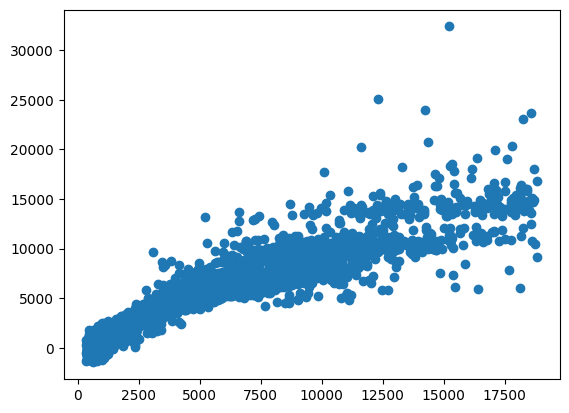

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.figure
plt.scatter(y_test, y_linreg_predict)

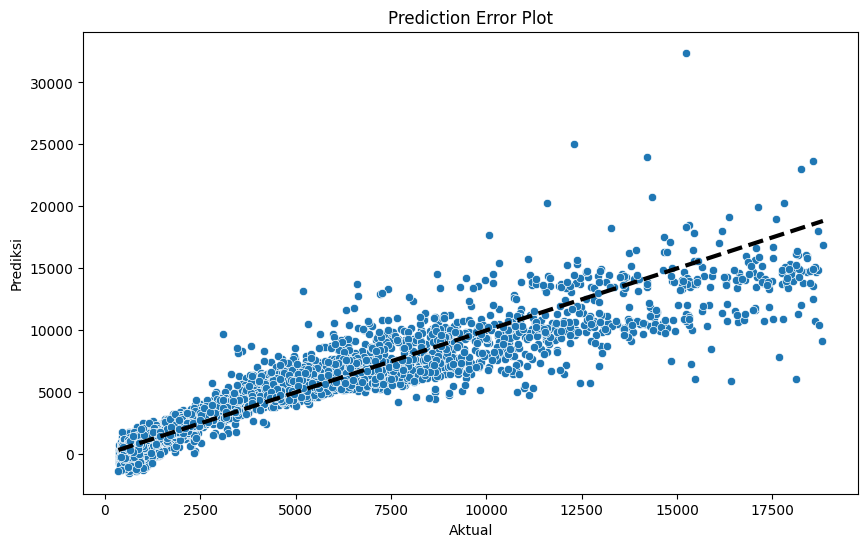

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan y_test adalah nilai aktual dan predictions adalah hasil prediksi model
# Anda perlu mengganti y_test dan predictions dengan data Anda

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_linreg_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Prediction Error Plot')
plt.show()


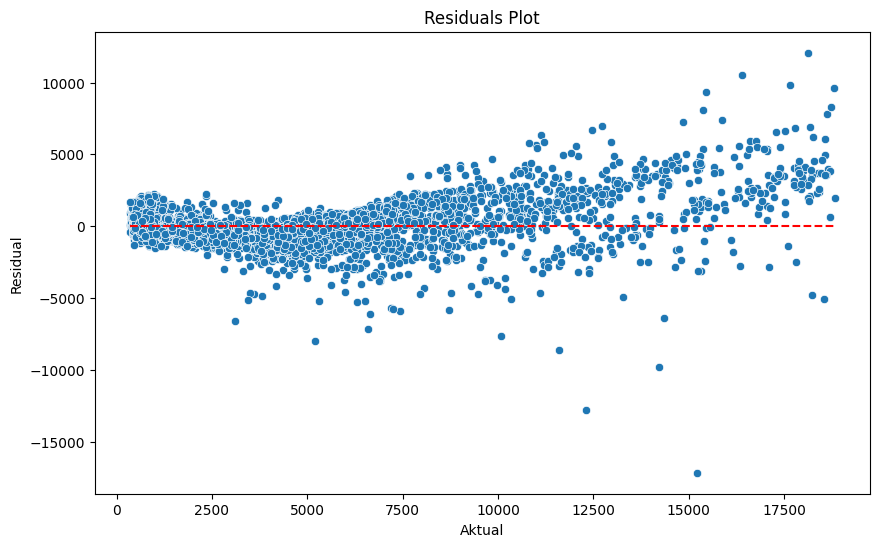

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung residual
residuals = y_test - y_linreg_predict

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='--')
plt.xlabel('Aktual')
plt.ylabel('Residual')
plt.title('Residuals Plot')
plt.show()


c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Melakukan cross-validation
# Anda bisa mengubah parameter cv untuk jumlah split yang berbeda
scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='r2')

# Menampilkan nilai R-squared untuk setiap split
print("R-squared scores for each split:", scores)

# Menampilkan nilai R-squared rata-rata
print("Average R-squared:", np.mean(scores))

R-squared scores for each split: [0.88460016 0.88420267 0.88648171 0.88195718 0.89188245]
Average R-squared: 0.8858248333250103


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [ ]:
# Buat list alpha
alphas = [0.01, 0.1, 1, 10, 100]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Misalkan alpha adalah list nilai alpha yang Anda miliki
# Misalkan X_train, X_test, y_train, y_test adalah data fitur dan target

list_mae = []
list_mse = []
list_rmse = []
list_r_squared_train = []
list_r_squared_test = []
lasso_reg = Lasso()

# Membangun dan mengevaluasi model untuk setiap nilai alpha
for a in alphas:
    # Membangun model
    lasso_reg.set_params(alpha=a)
    lasso_reg.fit(X_train, y_train)

    # Mengevaluasi model pada training dan testing set menggunakan R-squared
    r_squared_train = lasso_reg.score(X_train, y_train)
    r_squared_test = lasso_reg.score(X_test, y_test)

    # Mengevaluasi model pada testing set
    predictions = lasso_reg.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, predictions)

    # Menambahkan nilai ke list
    list_mae.append(mae)
    list_mse.append(mse)
    list_rmse.append(rmse)

    # Menambahkan nilai R-squared ke list
    list_r_squared_train.append(r_squared_train)
    list_r_squared_test.append(r_squared_test)


c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [ ]:
for i, alpha in enumerate(alphas):
    print(f"Alpha: {alpha}")
    print(f"MAE: {list_mae[i]}")
    print(f"MSE: {list_mse[i]}")
    print(f"RMSE: {list_rmse[i]}")
    print(f"R-squared (Train): {list_r_squared_train[i]}")
    print(f"R-squared (Test): {list_r_squared_test[i]}\n")

Alpha: 0.01
MAE: 876.2235102322628
MSE: 1875815.2313027931
RMSE: 1369.6040417955817
R-squared (Train): 0.8861260716058752
R-squared (Test): 0.8766722441171879

Alpha: 0.1
MAE: 876.3163049667703
MSE: 1875817.8545995709
RMSE: 1369.6049994796203
R-squared (Train): 0.886125972037985
R-squared (Test): 0.8766720716453479

Alpha: 1
MAE: 877.2996076390926
MSE: 1875925.5019374017
RMSE: 1369.644297596059
R-squared (Train): 0.8861158985309106
R-squared (Test): 0.876664994240079

Alpha: 10
MAE: 889.9846210276696
MSE: 1881815.1533172026
RMSE: 1371.7926786935418
R-squared (Train): 0.8855044832373941
R-squared (Test): 0.8762777719404187

Alpha: 100
MAE: 921.2456504003161
MSE: 1975527.2390993629
RMSE: 1405.5345029914288
R-squared (Train): 0.8771247829655969
R-squared (Test): 0.8701165567814051



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

Untuk menjaga keseimbangan model, saya memilih alpha dengan rata rata R-squared tertinggi

In [ ]:
# Menghitung rata-rata R-squared
average_r_squared = [(train + test) / 2 for train, test in zip(list_r_squared_train, list_r_squared_test)]

# Mencari alpha dengan rata-rata R-squared tertinggi
max_average_r_squared = max(average_r_squared)
best_alpha_index = average_r_squared.index(max_average_r_squared)
best_alpha = alphas[best_alpha_index]

print(f"Model terbaik memiliki alpha: {best_alpha} dengan rata-rata R-squared: {max_average_r_squared}")


Model terbaik memiliki alpha: 0.01 dengan rata-rata R-squared: 0.8813991578615316


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [ ]:
# Inisialisasi model Lasso dengan alpha terbaik
best_lasso_model = Lasso(alpha=best_alpha)

# Latih model dengan data latih (Anda perlu menyediakan X_train dan y_train)
best_lasso_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
predictions_lasso = best_lasso_model.predict(X_test)

# Tampilkan hasil prediksi
print("Hasil Prediksi:", predictions_lasso)

Hasil Prediksi: [5732.73066472 2141.75489239  -99.61951831 ... 7390.3492116   318.27373809
 6643.05034376]


f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

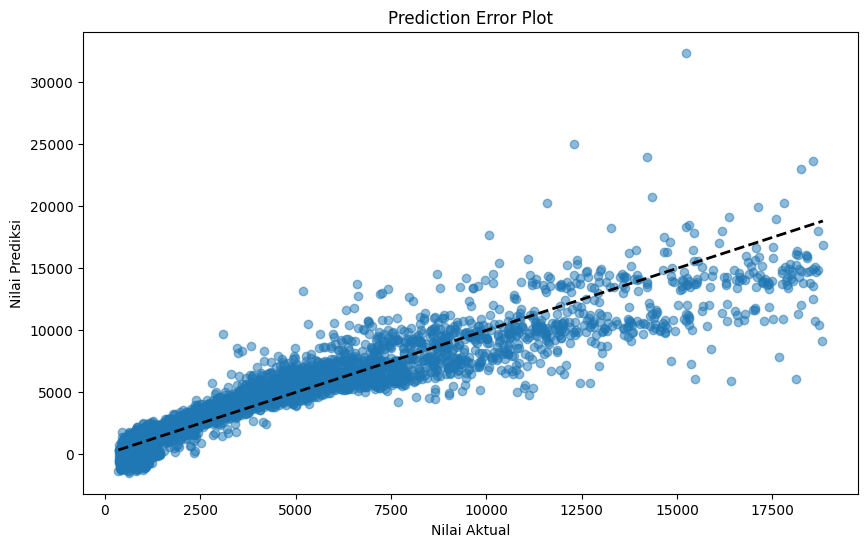

In [ ]:
import matplotlib.pyplot as plt

# Misalkan y_test adalah nilai aktual dan predictions adalah hasil prediksi model Anda

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Garis diagonal
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediction Error Plot')
plt.show()


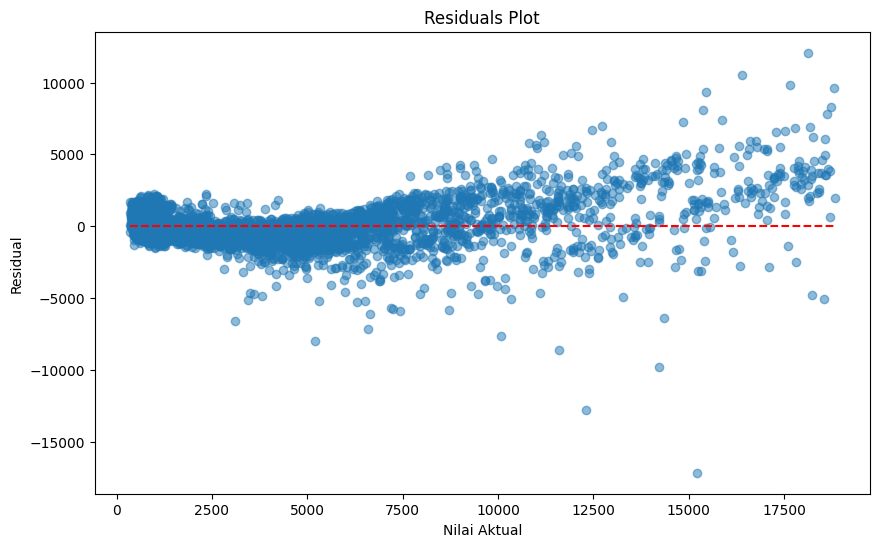

In [ ]:
import matplotlib.pyplot as plt

# Hitung residual
residuals = y_test - predictions_lasso

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='--') # Garis horizontal
plt.xlabel('Nilai Aktual')
plt.ylabel('Residual')
plt.title('Residuals Plot')
plt.show()


g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

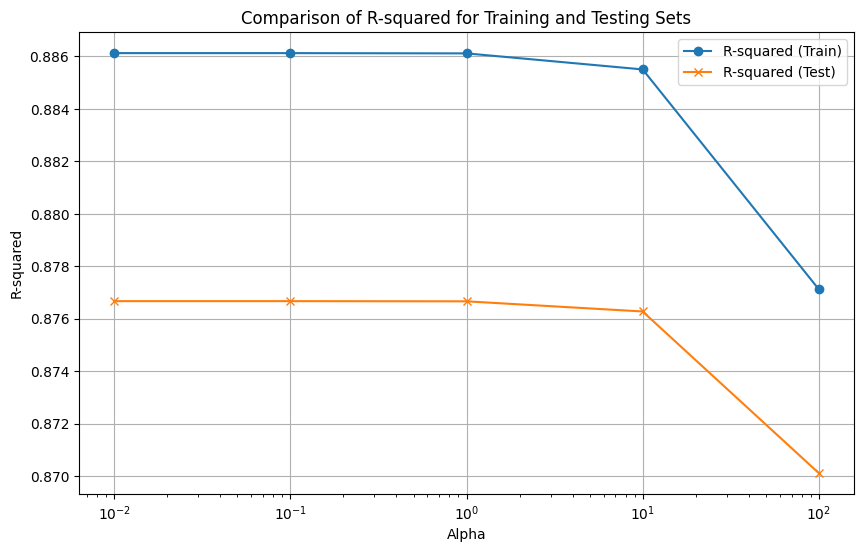

In [ ]:
import matplotlib.pyplot as plt

# Nilai alpha
alphas = [0.01, 0.1, 1, 10, 100]

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(alphas, list_r_squared_train, marker='o', linestyle='-', label='R-squared (Train)')
plt.plot(alphas, list_r_squared_test, marker='x', linestyle='-', label='R-squared (Test)')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for Training and Testing Sets')
plt.xscale('log')  # Skala logaritmik untuk alpha
plt.grid(True)
plt.legend()
plt.show()


`JAWABAN`

Dalam analisis hubungan antara nilai alpha dalam regresi Lasso dan R-squared:

- Alpha Kecil (0.01, 0.1, 1): Niai R-squared yang tinggi pada training dan testing. Sangat bagus untuk mengurangi bias tetapi mungkin berisiko overfitting.
- Alpha Sedang (10): Ada sedikit penurunan R-squared, menandakan peningkatan regularisasi yang bisa mengurangi overfitting tetapi meningkatkan bias.
- Alpha Besar (100): Penurunan signifikan dalam R-squared, menunjukkan regularisasi yang sangat kuat yang bisa menyebabkan model terlalu disederhanakan, mengurangi kemampuannya menangkap pola kompleks (meningkatkan bias).

Kesimpulannya, alpha di kisaran 0.01 hingga 1 tampaknya memberikan keseimbangan terbaik antara mengurangi overfitting dan menghindari peningkatan bias, dengan kinerja yang baik pada kedua training dan testing set. Secara umum terlihat bahwa semakin besar nilai alpha, semakin kecil nilai nilai r-squared. Dengan kata lain, semakin besar regularisasi, kualitas hasil regresi semakin buruk (tidak selalu)







#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [ ]:
# Buat list alpha
alphas = [0.01, 0.1, 1, 10, 100]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Misalkan alpha adalah list nilai alpha yang Anda miliki
# Misalkan X_train, X_test, y_train, y_test adalah data fitur dan target

list_mae = []
list_mse = []
list_rmse = []
list_r_squared_train = []
list_r_squared_test = []
ridge_reg = Ridge()

# Membangun dan mengevaluasi model untuk setiap nilai alpha
for a in alphas:
    # Membangun model
    ridge_reg.set_params(alpha=a)
    ridge_reg.fit(X_train, y_train)

    # Mengevaluasi model pada training dan testing set menggunakan R-squared
    r_squared_train = ridge_reg.score(X_train, y_train)
    r_squared_test = ridge_reg.score(X_test, y_test)

    # Mengevaluasi model pada testing set
    predictions_ridge = ridge_reg.predict(X_test)
    mae = mean_absolute_error(y_test, predictions_ridge)
    mse = mean_squared_error(y_test, predictions_ridge)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, predictions_ridge)

    # Menambahkan nilai ke list
    list_mae.append(mae)
    list_mse.append(mse)
    list_rmse.append(rmse)

    # Menambahkan nilai R-squared ke list
    list_r_squared_train.append(r_squared_train)
    list_r_squared_test.append(r_squared_test)


c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [ ]:
for i, alpha in enumerate(alphas):
    print(f"Alpha: {alpha}")
    print(f"MAE: {list_mae[i]}")
    print(f"MSE: {list_mse[i]}")
    print(f"RMSE: {list_rmse[i]}")
    print(f"R-squared (Train): {list_r_squared_train[i]}")
    print(f"R-squared (Test): {list_r_squared_test[i]}\n")

Alpha: 0.01
MAE: 876.2148789390409
MSE: 1875814.8064141788
RMSE: 1369.6038866819044
R-squared (Train): 0.8861260725640673
R-squared (Test): 0.8766722720520072

Alpha: 0.1
MAE: 876.2227496176871
MSE: 1875814.053411922
RMSE: 1369.6036117840526
R-squared (Train): 0.8861260723002344
R-squared (Test): 0.8766723215590572

Alpha: 1
MAE: 876.3014653786145
MSE: 1875806.833126399
RMSE: 1369.6009758781565
R-squared (Train): 0.8861260459708012
R-squared (Test): 0.8766727962655184

Alpha: 10
MAE: 877.0896906273437
MSE: 1875764.9726585501
RMSE: 1369.5856937988765
R-squared (Train): 0.8861234658149834
R-squared (Test): 0.8766755484329355

Alpha: 100
MAE: 885.069249879284
MSE: 1877849.1062088537
RMSE: 1370.3463453480852
R-squared (Train): 0.8859093272358866
R-squared (Test): 0.8765385245355761



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [ ]:
# Menghitung rata-rata R-squared
average_r_squared = [(train + test) / 2 for train, test in zip(list_r_squared_train, list_r_squared_test)]

# Mencari alpha dengan rata-rata R-squared tertinggi
max_average_r_squared = max(average_r_squared)
best_alpha_index = average_r_squared.index(max_average_r_squared)
best_alpha = alphas[best_alpha_index]

print(f"Model terbaik memiliki alpha: {best_alpha} dengan rata-rata R-squared: {max_average_r_squared}")


Model terbaik memiliki alpha: 10 dengan rata-rata R-squared: 0.8813995071239594


Berdasarkan output yang diberikan, model terbaik adalah model dengan **alpha = 10**. Model ini menunjukkan nilai R-squared (Test) tertinggi (0.8767) sambil juga memiliki kesesuaian yang baik antara R-squared (Train) dan R-squared (Test), menunjukkan kinerja yang baik dalam hal pembelajaran dan generalisasi.

e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [ ]:
# Inisialisasi model Ridge dengan alpha terbaik
best_ridge_model = Ridge(alpha=best_alpha) # alpha = 10

# Latih model dengan data latih (Anda perlu menyediakan X_train dan y_train)
best_ridge_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
predictions_ridge = best_ridge_model.predict(X_test)

# Tampilkan hasil prediksi
print("Hasil Prediksi:", predictions_ridge)


Hasil Prediksi: [5735.94097717 2141.94151943 -103.77974421 ... 7396.48211916  312.5477028
 6649.01137719]


f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

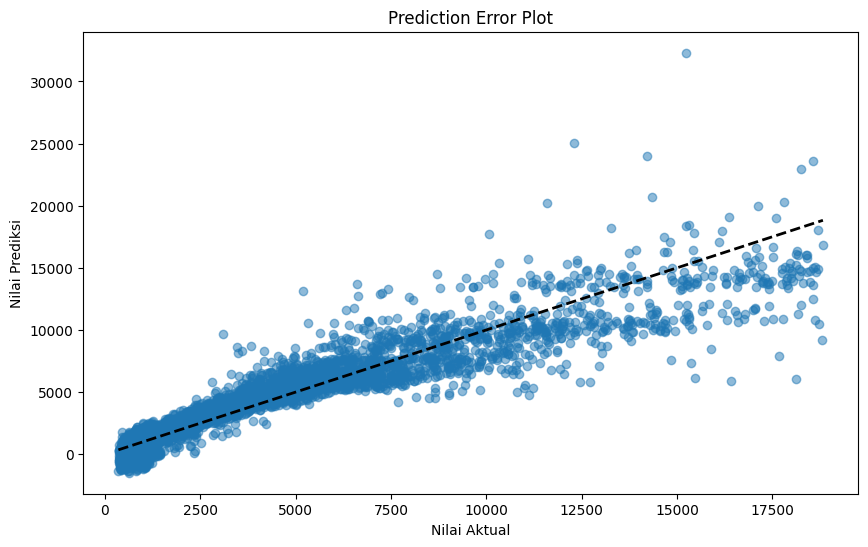

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Garis diagonal
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediction Error Plot')
plt.show()


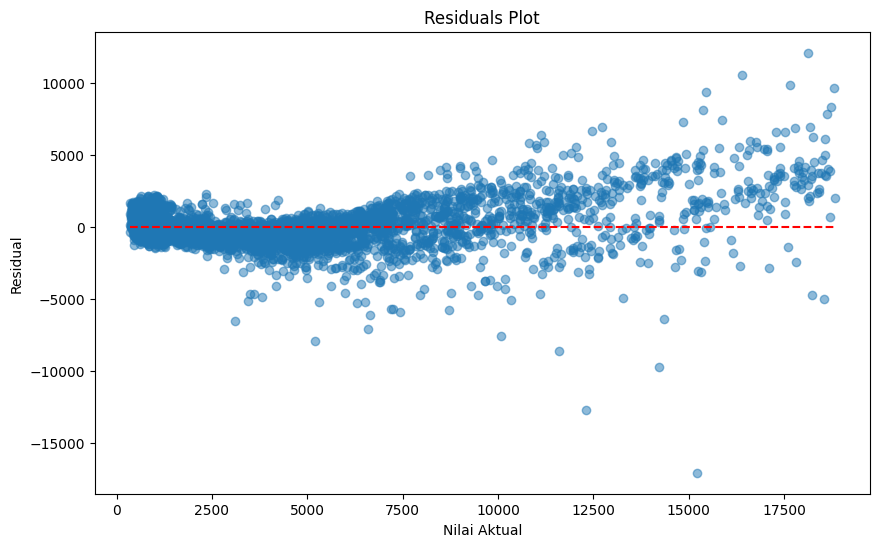

In [ ]:
import matplotlib.pyplot as plt

# Hitung residual
residuals_ridge = y_test - predictions_ridge

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_ridge, alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='--') # Garis horizontal
plt.xlabel('Nilai Aktual')
plt.ylabel('Residual')
plt.title('Residuals Plot')
plt.show()


g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

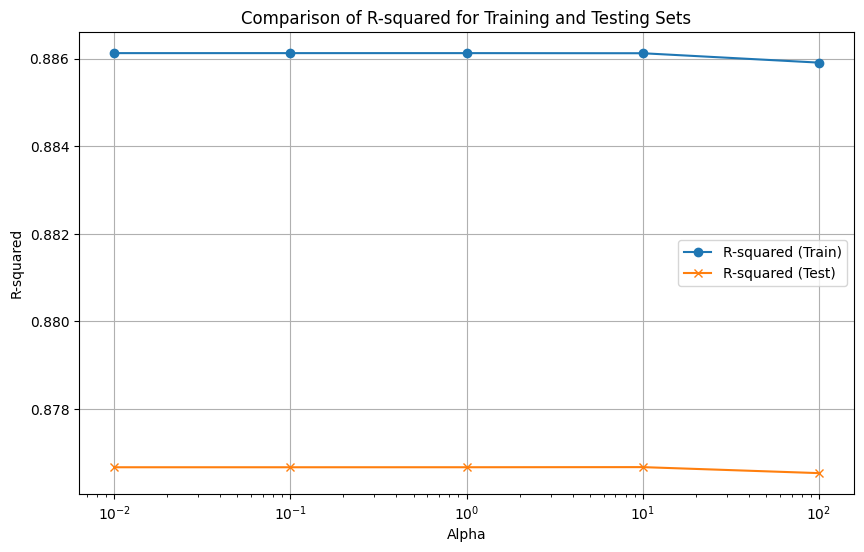

In [ ]:
import matplotlib.pyplot as plt

# Nilai alpha
alphas = [0.01, 0.1, 1, 10, 100]

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(alphas, list_r_squared_train, marker='o', linestyle='-', label='R-squared (Train)')
plt.plot(alphas, list_r_squared_test, marker='x', linestyle='-', label='R-squared (Test)')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for Training and Testing Sets')
plt.xscale('log')  # Skala logaritmik untuk alpha
plt.grid(True)
plt.legend()
plt.show()


`JAWABAN`
Dari grafik yang ditampilkan, terlihat bahwa model regresi Ridge cukup stabil dalam proses learning seiring dengan peningkatan nilai alpha, dengan nilai R-squared pada list pelatihan yang tetap relatif konstan.

Namun, peningkatan alpha dari 0.01 hingga 10 menunjukkan sedikit peningkatan yang konsisten pada kemampuan model untuk menggeneralisasi, sebagaimana ditunjukkan oleh R-squared yang meningkat juga.


Hal ini mengindikasikan bahwa nilai alpha sekitar 10 mungkin memberikan keseimbangan yang pas antara pembelajaran dan generalisasi tanpa tanda-tanda signifikan overfitting atau underfitting.

Namun, seperti Lasso, penurunan nilai R-squared pada alpha 100 berarti bahwa regularisasi sudah terlalu kuat dan mulai mengurangi kemampuan model untuk menangkap variabilitas data dan berpotensi untuk underfitting

h) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

`JAWABAN`

Lasso Regression dapat digunakan untuk feature selection karena punya feature selection bawaan yang secara otomatis memilih fitur-fitur yang berguna dan membuang fitur-fitur yang tidak berguna atau berlebihan dengan menyetel koefisiennya ke nol.

Hal ini disebabkan oleh teknik regularisasi L1 yang memperkecil koefisien menjadi nol dan dapat menyebabkan ketersebaran dalam model.

 Sementara Ridge Regression, yang menggunakan regularisasi L2, tidak memiliki properti feature selection yang sama karena koefisiennya menyusut ke arah tapi tidak nol, sehingga tidak melakukan pemilihan fitur otomatis.

 Geometri daerah yang dibatasi dalam lasso dan ridge juga menjelaskan mengapa laso dapat menyebabkan pemilihan fitur sedangkan regresi ridge tidak.

 Secara khusus, geometri model laso memungkinkan nilai koefisien menjadi nol sehingga memungkinkan pemilihan fitur, sedangkan geometri model ridge tidak menghasilkan kemampuan pemilihan fitur yang sama.



Citations:
- https://datascience.stackexchange.com/questions/57604/can-ridge-regression-be-used-for-feature-selection
- https://www.reddit.com/r/actuary/comments/qfvznj/lasso_vs_ridge_regression_feature_selection/
- https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression
- https://courses.cs.washington.edu/courses/cse416/22sp/lectures/4/lecture_4.pdf
- https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

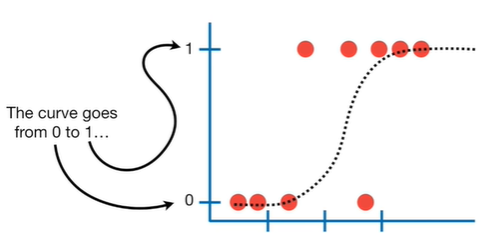

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

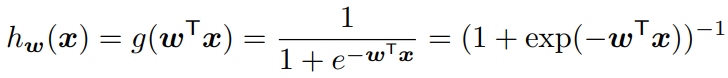

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

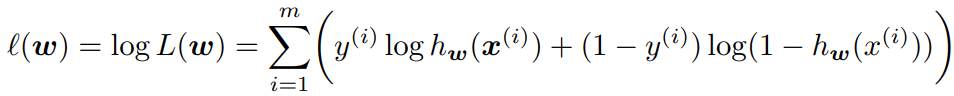

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [ ]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 4, 2, 3, 5, 6, 7, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[2 3]
 [3 4]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 7]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 0 0 1 1 0 0 1 1 1]


In [ ]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 5], [3, 6]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-4.475384273860628, 1.404075585690601, -0.12235462027224138]


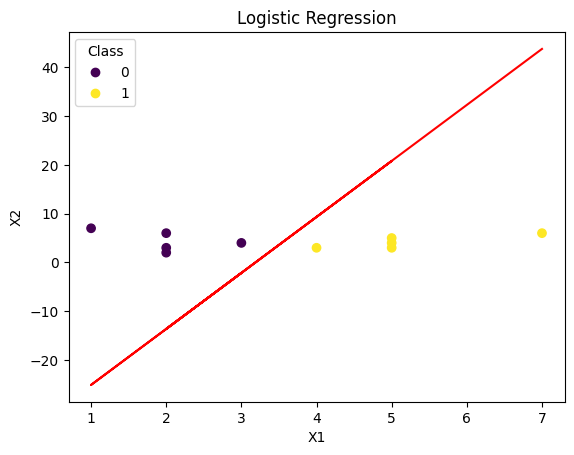

In [ ]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian logistic regression adalah data terkait *diabetes*. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **gender**: jenis kelamin biologis seseorang, yang dapat berdampak pada kerentanan mereka terhadap diabetes.

- **age**: usia, berkisar antara 0-80 tahun.

- **hypertension**: hipertensi (kondisi medis di mana tekanan darah di arteri terus meningkat). 0 = tidak menderita hipertensi, sedangkan 1 = menderita hipertensi.

- **heart_disease**: penyakit jantung. 0 = tidak menderita penyakit jantung, sedangkan 1 = menderita penyakit jantung.

- **smoking_history**: riwayat merokok, ada 6 kategori yaitu: not current,former, No Info, current, never, ever.

- **bmi**: Body Mass Index (pengukuran lemak tubuh berdasarkan berat dan tinggi badan). Kisaran BMI pada dataset adalah 10,16 hingga 71,55. BMI kurang dari 18,5 berarti kurus, 18,5-24,9 normal, 25-29,9 kelebihan berat badan, dan 30 atau lebih berarti obesitas.

- **HbA1c_level**: Tingkat HbA1c (Hemoglobin A1c) ( ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir)

- **blood_glucose_level**: Tingkat glukosa pada darah.

- **diabetes**: diabetes, 0 = tidak terindikasi diabetes, sedangkan 1 = terindikasi hipertensi.


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,48.0,0,0,ever,27.32,6.2,145,0
1,Female,44.0,0,1,ever,31.92,6.1,100,0
2,Female,61.0,0,0,No Info,27.32,4.8,159,0
3,Female,71.0,1,0,never,23.96,4.5,85,0
4,Female,51.0,0,0,current,28.49,6.1,200,0


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


##### Penanganan Missing Values

In [ ]:
# Melihat jumlah missing values
cek_missing_values(df_diabetes)

,Total,Percent


Tidak ada missing values, dapat dilanjutkan

##### Penganganan Duplikasi data

In [ ]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df_diamond.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


###### Pengangan Outliers

##### Encoding Data Kategorikal


In [ ]:
df_diabetes = label_encode(df_diabetes)
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,48.0,0,0,2,27.32,6.2,145,0
1,0,44.0,0,1,2,31.92,6.1,100,0
2,0,61.0,0,0,0,27.32,4.8,159,0
3,0,71.0,1,0,4,23.96,4.5,85,0
4,0,51.0,0,0,1,28.49,6.1,200,0


In [ ]:
# Memisahkan kolom-kolom target
X = df_diabetes.drop('diabetes', axis=1)
y_logistic = df_diabetes['diabetes']

#### Soal 5: Logistic Regression

a) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size=.2)

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membangun model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prediksi
y_logreg_predict = logreg.predict(X_test)

In [ ]:
# Confusion Matrix
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_logreg_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,1493,201
1,194,1512


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

# 4e. Tampilkan hasil evaluasi model

print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, y_pred, zero_division=0)))
print()

print("Informasi lebih lengkap")
print('F1 Macro Average:', f1_score(y_test, y_logreg_predict, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_logreg_predict, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_logreg_predict, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_logreg_predict, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_logreg_predict, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_logreg_predict, average='micro',zero_division=0))
print()

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1694
           1       0.88      0.89      0.88      1706

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



Informasi lebih lengkap
F1 Macro Average: 0.8838199012962256
F1 Micro Average: 0.8838235294117647
Precision Macro Average: 0.8838324801692555
Precision Micro Average: 0.8838235294117647
Recall Macro Average: 0.8838148156862854
Recall Micro Average: 0.8838235294117647



c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [ ]:
from sklearn.preprocessing import StandardScaler

# Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal

# Kolom bukan kategorikal
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension',
       'heart_disease']

# Jenis normalisasi yang saya pilih adalah standardisasi
scaler = StandardScaler()
scaler.fit(X_train[cols])

# Standardisasi
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

d) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membangun ulang model
logregnormal = LogisticRegression(max_iter=1000)
logregnormal.fit(X_train, y_train)

# Prediksi
y_logreg_predict_norm = logregnormal.predict(X_test)

In [ ]:
# Confusion Matrix
y_actual_norm = pd.Series(np.array(y_test), name = "actual")
y_pred_norm = pd.Series(np.array(y_logreg_predict_norm), name = "prediction")
df_confusion = pd.crosstab(y_actual_norm, y_pred_norm)
df_confusion

prediction,0,1
actual,,
0,1493,201
1,193,1513


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

#  Tampilkan hasil evaluasi model

print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, y_pred, zero_division=0)))
print()

print("Informasi lebih lengkap")
print('F1 Macro Average:', f1_score(y_test, y_logreg_predict_norm, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_logreg_predict_norm, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_logreg_predict_norm, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_logreg_predict_norm, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_logreg_predict_norm, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_logreg_predict_norm, average='micro',zero_division=0))
print()

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1694
           1       0.88      0.89      0.88      1706

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



Informasi lebih lengkap
F1 Macro Average: 0.8841136371500744
F1 Micro Average: 0.8841176470588236
Precision Macro Average: 0.8841291658534627
Precision Micro Average: 0.8841176470588236
Recall Macro Average: 0.8841078989219243
Recall Micro Average: 0.8841176470588236



e) Dari kedua model yang dibangun dengan data yang di normalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? berikan analisis mengenai hal tersebut.

`JAWABAN`
Berdasarkan output di atas, model dengan data yang dinormalisasi  memberikan performa yang sedikit lebih baik dibandingkan dengan model yang menggunakan data yang tidak dinormalisasi.

Perbedaan ini dapat dilihat pada nilai F1 Micro Average, Precision Micro Average, dan Recall Micro Average, di mana model dengan data dinormalisasi memiliki nilai yang sedikit lebih tinggi.

Normalisasi data biasanya membantu dalam menghilangkan bias yang biasa disebabkan oleh skala fitur yang berbeda, memungkinkan algoritma pembelajaran mesin untuk berkonvergensi lebih cepat dan memberikan performa yang lebih stabil. Pada kasus ini, walaupun kecil, masih terlihat bahwa normalisasi data memberikan keuntungan pada kinerja model.

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

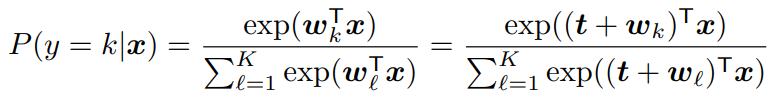

Persamaan likelihood softmaxe regression:

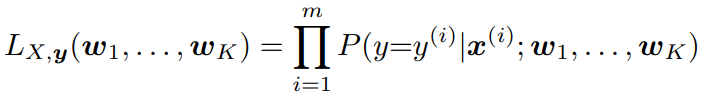

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [ ]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([0, 1, 0, 2, 2, 1, 0, 2, 2, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 1 0 2 2 1 0 2 2 2]


In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.69333009 -2.77478855 -1.91854154] [[-0.7077521  -0.62923839]
 [-0.31769488  0.84892058]
 [ 1.02544698 -0.21968219]]


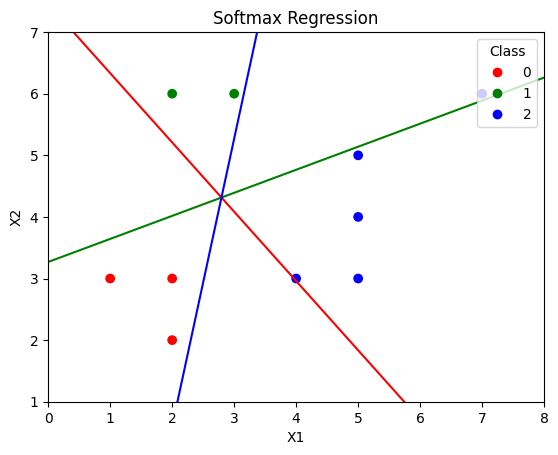

In [ ]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

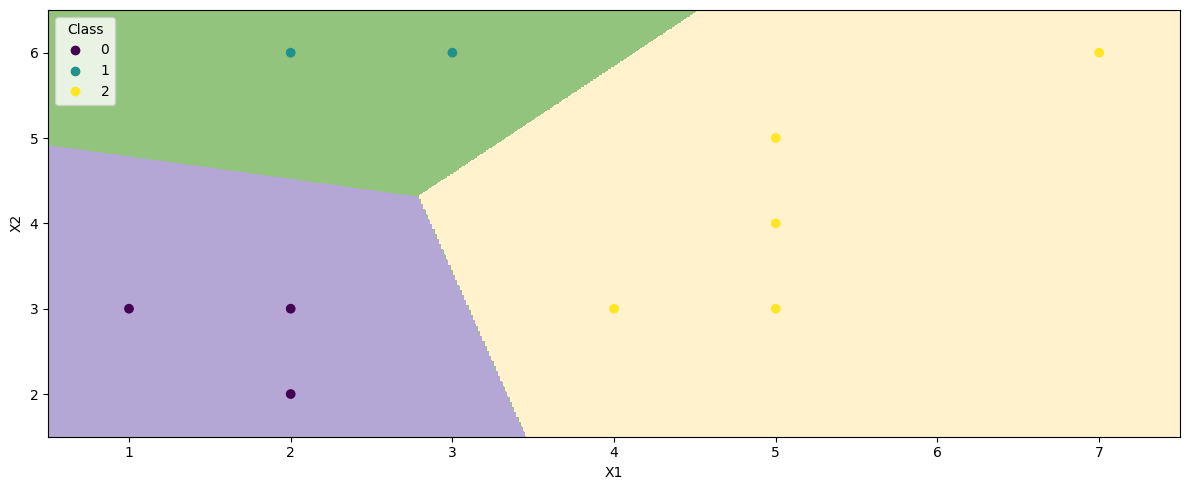

In [ ]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

Dataset yang digunakan pada bagian softmax regression adalah data terkait gambar dari dry beans. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Area (A)**: Luas zona kacang dan jumlah piksel dalam batasnya.

- **Perimeter (P)**: Keliling kacang didefinisikan sebagai panjang tepinya.

- **Major axis length (L)**: jarak antara ujung-ujung garis terpanjang yang dapat ditarik dari kacang.

- **Minor axis length (l)**: Garis terpanjang yang dapat ditarik dari kacang sambil berdiri tegak lurus terhadap sumbu utama.

- **Aspect ratio (K)**: Mendefinisikan hubungan antara L dan l.

- **Eccentricity (Ec)**: Eksentrisitas elips yang momennya sama dengan daerah.

- **Convex area (C)**: Jumlah piksel dalam poligon cembung terkecil yang dapat memuat luas biji kacang.

- **Equivalent diameter (Ed)**: Diameter lingkaran yang luasnya sama dengan luas biji kacang.

- **Extent (Ex)**: Rasio piksel dalam kotak pembatas pada area kacang.

- **Solidity (S)**: Soliditas juga dikenal sebagai konveksitas, yaitu rasio piksel pada cangkang cembung dengan piksel pada kacang.

- **Roundness (R)**: Dihitung dengan rumus  (4*pi*A)/(P^2) dengan A adalah Area dan P adalah perimeter

- **Compactness (CO)**: Mengukur kebulatan suatu benda

- **ShapeFactor1 (SF1)**: Ukuran kacang

- **ShapeFactor2 (SF2)**: Ukuran kacang

- **ShapeFactor3 (SF3)**: Ukuran kacang

- **ShapeFactor4 (SF4)**: Ukuran kacang

- **Class**: Jenis Kacang, (0 = Seker, 1 = Barbunya, 2 = Bombay, 3 = Cali, 4 = Dermason, 5 = Horoz, dan 6 = Sira)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/whenamancodes/dry-beans-dataset
<br/> <br/>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2048855/3398802/f484410f3cfb3f7f49d1216f57f18850/dataset-cover.jpg?t=2022-04-02-23-21-35" alt="Seker Dry Beans" width=300/>


In [ ]:
import pandas as pd

# Import dataset dry beans dan menampilkan 5 row teratas
df_beans = pd.read_csv('dry_beans_dataset.csv')

# Melakukan encoding pada tiap label
df_beans["Class"] = df_beans["Class"].map({
    "SEKER": 0,
    "BARBUNYA": 1,
    "BOMBAY": 2,
    "CALI": 3,
    "DERMASON": 4,
    "HOROZ": 5,
    "SIRA": 6
})

df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

#### Soal 6: Softmax Regression

In [ ]:
# Memisahkan kolom-kolom target
X = df_beans.drop('Class', axis=1)
y_softmax = df_beans['Class']

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_softmax, test_size=.2)

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [ ]:
from sklearn.preprocessing import StandardScaler

# Jenis normalisasi yang saya pilih adalah standardisasi
scaler = StandardScaler()
scaler.fit(X_train)

# Standardisasi
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
# Membangun model
sofreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
sofreg.fit(X_train, y_train)

# Prediksi
y_sofreg_predict = sofreg.predict(X_test)

In [ ]:
#Tampilkan confussion matrix hasil prediksi

y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_sofreg_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,389,4,0,0,9,0,13
1,3,235,0,15,0,1,6
2,0,0,112,0,0,0,0
3,2,14,0,305,0,4,5
4,10,0,0,0,663,1,49
5,0,0,0,6,2,376,5
6,6,1,0,0,56,6,425


In [ ]:
# Tampilkan hasil evaluasi model

print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, y_pred, zero_division=0)))
print()

print("Informasi lebih lengkap")
print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro',zero_division=0))
print()

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       415
           1       0.93      0.90      0.91       260
           2       1.00      1.00      1.00       112
           3       0.94      0.92      0.93       330
           4       0.91      0.92      0.91       723
           5       0.97      0.97      0.97       389
           6       0.84      0.86      0.85       494

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



Informasi lebih lengkap
F1 Macro Average: 0.9314689302300904
F1 Micro Average: 0.9199412412780023
Precision Macro Average: 0.9331117029728776
Precision Micro Average: 0.9199412412780023
Recall Macro Average: 0.9299078981878784
Recall Micro Average: 0.9199412412780023



d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

`JAWABAN`

Berdasarkan output dari kedua model di atas, terlihat bahwa model yang datanya dilakukan normalisasi terlebih dahulu menghasilkan performa yang sedikit lebih baik dibandingkan dengan model yang datanya tidak dinormalisasi. Hal ini dikarenakan proses normalisasi menstandarkan skala dari fitur-fitur yang ada, sehingga mesin pembelajaran menjadi lebih efesien.

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi serta sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/09051471139246639e739754ced8691a)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [ ]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_bonus_train = pd.read_csv('co2_emissions_train.csv')
df_bonus_train.head()

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,6125,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.7,7.8,8.8,32,206
1,725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
2,967,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,AV,X,9.5,7.2,8.5,33,196
3,1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
4,290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317


In [ ]:
# Menampilkan informasi keseluruhan terkait dataset
df_bonus_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                5908 non-null   int64  
 1   Make                              5908 non-null   object 
 2   Model                             5908 non-null   object 
 3   Vehicle Class                     5908 non-null   object 
 4   Engine Size(L)                    5908 non-null   float64
 5   Cylinders                         5908 non-null   int64  
 6   Transmission                      5908 non-null   object 
 7   Fuel Type                         5908 non-null   object 
 8   Fuel Consumption City (L/100 km)  5908 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 10  Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 11  Fuel Consumption Comb (mpg)       5908 non-null   int64  
 12  CO2 Em

In [ ]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df_bonus_train.describe(include=object))

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,5908,5908,5908,5908,5908
unique,42,1924,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,509,26,974,1059,2921


In [ ]:
# Drop Id
df_bonus_train = df_bonus_train.drop('Id', axis=1)
df_bonus_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.7,7.8,8.8,32,206
1,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
2,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,AV,X,9.5,7.2,8.5,33,196
3,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
4,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317


In [ ]:
# Melihat jumlah missing value
cek_missing_values(df_bonus_train)

,Total,Percent


In [ ]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df_bonus_train.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 1380


In [ ]:
# Mendrop duplikasi data
df_bonus_train.drop_duplicates(inplace=True)

In [ ]:
print('Jumlah duplikasi pada data adalah', df_bonus_train.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [ ]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df_bonus_train.quantile(0.25)
Q3 = df_bonus_train.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df_bonus_train < lower_limit) | (df_bonus_train > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
CO2 Emissions                        62
Cylinders                           153
Engine Size(L)                      108
Fuel Consumption City (L/100 km)     97
Fuel Consumption Comb (L/100 km)    106
Fuel Consumption Comb (mpg)          81
Fuel Consumption Hwy (L/100 km)     134
Fuel Type                             0
Make                                  0
Model                                 0
Transmission                          0
Vehicle Class                         0
dtype: int64


<ipython-input-1703-7d0e78a9953f>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_bonus_train.quantile(0.25)
<ipython-input-1703-7d0e78a9953f>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_bonus_train.quantile(0.75)
<ipython-input-1703-7d0e78a9953f>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df_bonus_train < lower_limit) | (df_bonus_train > upper_limit)


In [ ]:
# Menghapus outliers
df_bonus_train = df_bonus_train[~((df_bonus_train <= lower_limit) | (df_bonus_train >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_bonus_train.shape)

(4779, 12)


<ipython-input-1704-7783426b54aa>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_bonus_train = df_bonus_train[~((df_bonus_train <= lower_limit) | (df_bonus_train >= upper_limit)).any(axis=1)].reset_index(drop=True)


In [ ]:
df_bonus_train = label_encode(df_bonus_train)
df_bonus_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,26,527,11,2.5,4,15,3,9.7,7.8,8.8,32,206
1,27,342,9,2.0,4,16,4,9.2,6.6,8.0,35,184
2,35,1737,11,2.0,4,19,3,9.5,7.2,8.5,33,196
3,3,230,2,3.0,6,17,0,9.8,6.2,8.1,35,217
4,19,1286,11,2.4,4,6,3,10.8,7.8,9.5,30,222


In [ ]:
# Memisahkan kolom-kolom target
X = df_bonus_train.drop('CO2 Emissions', axis=1)
y = df_bonus_train['CO2 Emissions']

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.2, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal

# Kolom bukan kategorikal
cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']

# Jenis normalisasi yang saya pilih adalah standardisasi
scaler = StandardScaler()
scaler.fit(X_train[cols])

# Standardisasi
X_train[cols] = scaler.transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
X_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
2788,5,995,10,-0.003582,0.416764,17,4,-0.149802,-0.389098,-0.208823,0.056777
3683,30,1086,11,0.408902,0.416764,19,3,0.343747,0.691440,0.469272,-0.613153
1138,10,936,11,0.491399,0.416764,3,1,2.353195,2.204194,2.334032,-1.785529
2674,19,1286,11,-0.498563,-0.907666,6,3,-0.502337,-0.605206,-0.547870,0.391741
647,14,1413,6,1.068877,0.416764,3,3,0.696282,1.015602,0.808319,-0.948118


In [ ]:
X_test.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
1216,12,1546,7,-0.416066,-0.907666,15,3,-0.114548,-0.118964,-0.124061,-0.110706
1764,14,1412,6,1.893845,1.741194,3,3,0.978309,1.015602,1.020224,-0.948118
3615,12,688,12,0.408902,0.416764,15,3,0.590521,0.421305,0.554034,-0.613153
3379,12,768,10,-1.653519,-1.569881,24,3,-1.665701,-1.793798,-1.734535,2.569012
4544,7,320,0,0.491399,0.416764,17,4,0.872549,0.529359,0.765938,-0.780635


In [ ]:
# Membangun model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_linreg_predict = linreg.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Melakukan cross-validation
# Anda bisa mengubah parameter cv untuk jumlah split yang berbeda
scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='r2')

# Menampilkan nilai R-squared untuk setiap split
print("R-squared scores for each split:", scores)

# Menampilkan nilai R-squared rata-rata
print("Average R-squared:", np.mean(scores))

R-squared scores for each split: [0.8902056  0.90121145 0.90071187 0.91176215 0.88877818]
Average R-squared: 0.8985338490614101


#### Test Data

In [ ]:
df_bonus_test = pd.read_csv('co2_emissions_test.csv')
df_bonus_test.head()

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,6460,TOYOTA,Yaris (SIL),COMPACT,1.5,4,M6,X,7.8,6.0,6.8,42
1,1209,BMW,ACTIVEHYBRID 3,COMPACT,3.0,6,AS8,Z,9.7,7.5,8.7,32
2,4197,PORSCHE,911 CARRERA CABRIOLET,MINICOMPACT,3.0,6,M7,Z,12.0,8.2,10.3,27
3,6318,PORSCHE,911 Carrera 4,MINICOMPACT,3.0,6,AM7,Z,10.7,8.3,9.6,29
4,3786,HONDA,ACCORD COUPE,MID-SIZE,3.5,6,M6,X,12.9,8.4,10.9,26


In [ ]:
df_bonus_test = label_encode(df_bonus_test)
df_bonus_test.head()

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,6460,39,943,0,1.5,4,23,2,7.8,6.0,6.8,42
1,1209,5,127,0,3.0,6,16,3,9.7,7.5,8.7,32
2,4197,32,90,3,3.0,6,24,3,12.0,8.2,10.3,27
3,6318,32,94,3,3.0,6,9,3,10.7,8.3,9.6,29
4,3786,16,125,2,3.5,6,23,2,12.9,8.4,10.9,26


In [ ]:
ID = df_bonus_test['Id']

In [ ]:
# Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal

# Kolom bukan kategorikal
cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']

# Jenis normalisasi yang saya pilih adalah standardisasi
scaler = StandardScaler()
scaler.fit(df_bonus_test[cols])

# Standardisasi
df_bonus_test[cols] = scaler.transform(df_bonus_test[cols])

In [ ]:
df_bonus_test = df_bonus_test.drop('Id', axis=1)
df_bonus_test.head()

KeyError: ignored

In [ ]:
# Melakukan prediksi pada data testing
y_bonus_test_predict = linreg.predict(df_bonus_test)

In [ ]:
eda_bonus = pd.DataFrame({'Id': ID, 'CO2 Emissions': y_bonus_test_predict})
eda_bonus.to_csv('eda_bonus.csv', index=False)